<a href="https://colab.research.google.com/github/blazingbhavneek/ner_crf_tf/blob/main/NER_Bhavneek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2
## Bhavneek Singh
## 2020EE10482

In [1]:
import tensorflow as tf
import random 
import zipfile
import pandas as pd
import numpy as np

In [2]:
zip_ref = zipfile.ZipFile("/content/drive/My Drive/Assignment_2.zip", 'r') # mounted my gdrive
zip_ref.extractall("/tmp")
zip_ref.close()

In [3]:
def read_file(filename):
    with open(filename, "r") as file:
        text = file.readlines()
    return text

def process_text(text):
    X = []
    Y = []
    sentenceX = []
    sentenceY = []
    for line in text:
        split = line.split(" ")
        if len(split) > 1:
            sentenceX.append(split[0])
            sentenceY.append(split[1].replace("\n", ""))
        else:
            X.append(sentenceX)
            Y.append(sentenceY)
            sentenceX = []
            sentenceY = []
    return X, Y

text = read_file("/tmp/Assignment 2/data/train.txt")
X, Y = process_text(text)

text_test = read_file("/tmp/Assignment 2/data/test.txt")
X_test, Y_test = process_text(text_test)

In [4]:
ind = random.randint(0,len(X))

for i in range(len(X[ind])):
    print(X[ind][i], Y[ind][i])

`` O
The B-NP
owners I-NP
of B-PP
the B-NP
company I-NP
got B-VP
a B-NP
look I-NP
at B-PP
the B-NP
potential I-NP
risks I-NP
in B-PP
this B-NP
business I-NP
, O
and O
after B-PP
Monday B-NP
they B-NP
felt B-VP
they B-NP
did B-VP
n't I-VP
want I-VP
to I-VP
be I-VP
exposed I-VP
any B-ADVP
more I-ADVP
, O
'' O
he B-NP
said B-VP
. O


In [5]:
labels = {'I-NP'} # Initialize a set of strings

for i in range(len(Y)):
    for j in range(len(Y[i])):
      labels.add(Y[i][j])

for i in range(len(Y_test)):
    for j in range(len(Y_test[i])):
      labels.add(Y_test[i][j])

labels = np.array(list(labels))
print(labels)
print(len(labels))

['I-CONJP' 'B-PP' 'B-SBAR' 'I-ADJP' 'B-PRT' 'B-NP' 'I-LST' 'B-CONJP'
 'I-PRT' 'O' 'I-ADVP' 'I-UCP' 'B-ADJP' 'B-VP' 'B-INTJ' 'I-NP' 'I-INTJ'
 'B-UCP' 'B-ADVP' 'I-SBAR' 'I-VP' 'I-PP' 'B-LST']
23


In [6]:
arr = np.arange(1,24) # 1-23 because we will have a 0 class for empty slots, i.e no word there
arr

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23])

In [7]:
dict = {}
for A, B in zip(labels, arr):
    dict[A] = B

In [8]:
dict

{'I-CONJP': 1,
 'B-PP': 2,
 'B-SBAR': 3,
 'I-ADJP': 4,
 'B-PRT': 5,
 'B-NP': 6,
 'I-LST': 7,
 'B-CONJP': 8,
 'I-PRT': 9,
 'O': 10,
 'I-ADVP': 11,
 'I-UCP': 12,
 'B-ADJP': 13,
 'B-VP': 14,
 'B-INTJ': 15,
 'I-NP': 16,
 'I-INTJ': 17,
 'B-UCP': 18,
 'B-ADVP': 19,
 'I-SBAR': 20,
 'I-VP': 21,
 'I-PP': 22,
 'B-LST': 23}

In [9]:
X_sentences = []
maxlen = 0
for i in range(len(X)):
  str = ""
  maxlen = max(maxlen,len(X[i]))
  for j in range(len(X[i])):
    str += X[i][j].lower()
    str += " "
  X_sentences.append(str)

In [10]:
Xt_sentences = []

for i in range(len(X_test)):
  str = ""
  maxlen = max(maxlen,len(X_test[i]))
  for j in range(len(X_test[i])):
    str += X_test[i][j].lower()
    str += " "
  Xt_sentences.append(str)

In [11]:
print(X_sentences[0])
print(Xt_sentences[0])
print(maxlen)

confidence in the pound is widely expected to take another sharp dive if trade figures for september , due for release tomorrow , fail to show a substantial improvement from july and august 's near-record deficits . 
rockwell international corp. 's tulsa unit said it signed a tentative agreement extending its contract with boeing co. to provide structural parts for boeing 's 747 jetliners . 
78


In [12]:
Y_labels = []

for i in range(len(Y)):
  arr = []
  for j in range(len(Y[i])):
    arr.append(int(dict[Y[i][j]]))
  arr = np.array(arr, dtype = 'int32').astype('int32')
  Y_labels.append(arr)

Y_labels = np.array(Y_labels)

<ipython-input-12-343049478399>:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y_labels = np.array(Y_labels)


In [13]:
Yt_labels = []
for i in range(len(Y_test)):
  arr = []
  for j in range(len(Y_test[i])):
    arr.append(dict[Y_test[i][j]])
  arr = np.array(arr, dtype = 'int32').astype('int32')
  Yt_labels.append(arr)

Yt_labels = np.array(Yt_labels)

<ipython-input-13-98b44f0eacbe>:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Yt_labels = np.array(Yt_labels)


In [14]:
print(Y_labels[:5])
print(Y_labels.shape)

[array([ 6,  2,  6, 16, 14, 21, 21, 21, 21,  6, 16, 16,  3,  6, 16,  2,  6,
        10, 13,  2,  6,  6, 10, 14, 21, 21,  6, 16, 16,  2,  6, 16, 16,  6,
        16, 16, 10], dtype=int32)
 array([10,  2,  6, 16,  6, 16,  6, 16, 16,  2,  6, 16, 16, 16, 14, 21, 21,
        21,  6, 16,  2,  6,  2,  6, 16, 16, 10], dtype=int32)
 array([10,  6, 14,  6, 16,  2,  6, 14, 21, 21,  2,  6, 16,  6, 16, 14, 21,
         6, 16, 16, 16,  2,  6, 16, 16, 16,  6, 16, 10], dtype=int32)
 array([ 6, 14, 21,  6, 16,  2,  6, 16, 14, 21, 21, 21,  6, 16,  2,  6, 16,
         2,  6, 16, 16, 16, 16, 14, 21,  6, 16, 10,  6, 10,  6, 16, 16, 16,
        14, 10], dtype=int32)
 array([10,  6, 16,  2,  6,  2,  6, 16, 16, 16, 14, 19, 11,  2,  6, 16, 16,
        10, 10, 14,  6, 16, 10,  6, 16, 16,  2,  6, 16, 16, 10],
       dtype=int32)                                                        ]
(8936,)


In [15]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
Ytrain = pad_sequences(Y_labels, maxlen = maxlen,  padding = 'post', truncating = 'post')

In [16]:
print(Ytrain[:5])
print(Ytrain.shape)

[[ 6  2  6 16 14 21 21 21 21  6 16 16  3  6 16  2  6 10 13  2  6  6 10 14
  21 21  6 16 16  2  6 16 16  6 16 16 10  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [10  2  6 16  6 16  6 16 16  2  6 16 16 16 14 21 21 21  6 16  2  6  2  6
  16 16 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [10  6 14  6 16  2  6 14 21 21  2  6 16  6 16 14 21  6 16 16 16  2  6 16
  16 16  6 16 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 6 14 21  6 16  2  6 16 14 21 21 21  6 16  2  6 16  2  6 16 16 16 16 14
  21  6 16 10  6 10  6 16 16 16 14 10  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [10  6 16  2  6  2  6 16 16

In [17]:
from tensorflow.keras.utils import to_categorical
Ytrain_cat = to_categorical(Ytrain)

In [18]:
print(Ytrain_cat[0])
Ytrain_cat.shape

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


(8936, 78, 24)

In [19]:
Ytest = pad_sequences(Yt_labels, maxlen = maxlen,  padding = 'post', truncating = 'post')
Ytest_cat = to_categorical(Ytest)

In [20]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_sentences)
word2index = tokenizer.word_index

In [21]:
Xtokens = tokenizer.texts_to_sequences(X_sentences)
Xtrain = pad_sequences(Xtokens, maxlen = maxlen,  padding = 'post', truncating = 'post')

In [22]:
Xtrain[0]

array([1600,    5,    1, 1517,   11, 1160,  192,    3,  224,  273, 1202,
       4919,   75,  489,  605,    7,  473,  252,    7, 1816, 2587, 4139,
          3,  606,    4, 1375, 1439,   16,  753,    6,  588,    8,  754,
        525, 8485,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0], dtype=int32)

In [23]:
type(Xtrain[0][0])

numpy.int32

In [24]:
X_test_tokens = tokenizer.texts_to_sequences(Xt_sentences)
Xtest = pad_sequences(X_test_tokens, maxlen = maxlen,  padding = 'post', truncating = 'post')
Xtest[0]

array([  235,    71,     8, 12484,   216,    12,    13,  2256,     4,
        4284,   459,    25,   478,    21,  4296,    95,     3,   876,
        1697,  1007,     7,  4296,     8,  5793,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0], dtype=int32)

In [25]:
file = open('/content/drive/My Drive/glove.6B.100d.txt', 'r', encoding = 'utf8')
content = file.readlines()
file.close()

In [26]:
embeddings = {}

for line in content:
    line = line.split()
    embeddings[line[0]] = np.array(line[1:], dtype = float)

In [27]:
embed_size = 100 # The vector size we chose
embedding_matrix = np.zeros((len(word2index)+1, embed_size)) # initializing a 0 matrix

miss_count = 0

for word, i in word2index.items():
  if word in embeddings.keys(): # Some words are not present
    embed_vector = embeddings[word]
    embedding_matrix[i] = embed_vector
  else:
    miss_count+=1
    embedding_matrix[i] = np.random.rand(100) # Initializing a random vector for them

print(miss_count)

357


In [28]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="tmp/checkpoint/",
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [29]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Bidirectional

In [30]:
print(Xtrain.shape)
print(Ytrain_cat.shape)
print(Xtest.shape)
print(Ytest_cat.shape)

(8936, 78)
(8936, 78, 24)
(2012, 78)
(2012, 78, 24)


In [95]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Bidirectional

model = Sequential([
    tf.keras.layers.Input(shape=(78), dtype='int32'),
    Embedding(input_dim = len(word2index) + 1,
              output_dim = embed_size,
              input_length = maxlen,
              weights = [embedding_matrix],
              trainable = True # We have a 357 random vectors in the matrix
             ),
    
    Bidirectional(LSTM(units = 256, return_sequences = True)),
    Bidirectional(LSTM(units = 256, return_sequences = True)),
    Bidirectional(LSTM(units = 256, return_sequences = True)),
    Bidirectional(LSTM(units = 256, return_sequences = True)),
    Dense(24, activation = 'softmax')
])

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [96]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 78, 100)           1489400   
                                                                 
 bidirectional_4 (Bidirectio  (None, 78, 512)          731136    
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 78, 512)          1574912   
 nal)                                                            
                                                                 
 bidirectional_6 (Bidirectio  (None, 78, 512)          1574912   
 nal)                                                            
                                                                 
 bidirectional_7 (Bidirectio  (None, 78, 512)          1574912   
 nal)                                                 

In [97]:
history = model.fit(Xtrain, Ytrain_cat, epochs = 10, validation_data=(Xtest,Ytest_cat), callbacks=[model_checkpoint_callback])

Epoch 1/10
280/280 [==============================] - 43s 104ms/step - loss: 0.5909 - accuracy: 0.7860 - val_loss: 0.5706 - val_accuracy: 0.8006
Epoch 2/10
280/280 [==============================] - 17s 62ms/step - loss: 0.4509 - accuracy: 0.8318 - val_loss: 0.5139 - val_accuracy: 0.8200
Epoch 3/10
280/280 [==============================] - 18s 64ms/step - loss: 0.3828 - accuracy: 0.8559 - val_loss: 0.4828 - val_accuracy: 0.8325
Epoch 4/10
280/280 [==============================] - 17s 60ms/step - loss: 0.3343 - accuracy: 0.8734 - val_loss: 0.5114 - val_accuracy: 0.8340
Epoch 5/10
280/280 [==============================] - 17s 61ms/step - loss: 0.2930 - accuracy: 0.8891 - val_loss: 0.5380 - val_accuracy: 0.8331
Epoch 6/10
280/280 [==============================] - 16s 56ms/step - loss: 0.2589 - accuracy: 0.9021 - val_loss: 0.5573 - val_accuracy: 0.8338
Epoch 7/10
280/280 [==============================] - 17s 62ms/step - loss: 0.2238 - accuracy: 0.9162 - val_loss: 0.6212 - val_accuracy

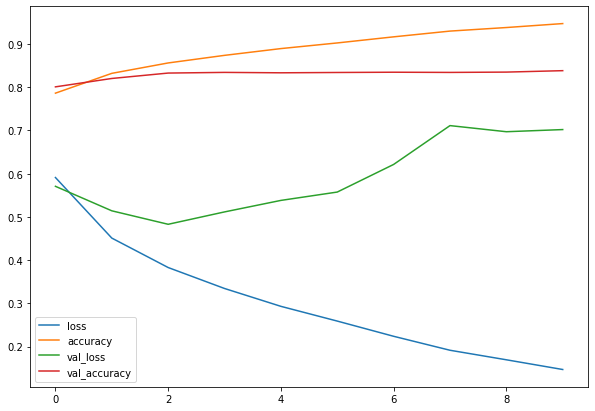

In [98]:
pd.DataFrame(history.history).plot(figsize=(10, 7));

In [100]:
model.save("tmp/bhavneek_model.h5")

from google.colab import files
files.download("tmp/bhavneek_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [101]:
Y_pred_cat_1 = model.predict(Xtest)

63/63 [==============================] - 5s 22ms/step


In [102]:
print(Y_pred_cat_1.shape)

(2012, 78, 24)


In [103]:
from tensorflow.python.ops.math_ops import argmax
Y_pred_label_1 = []

for i in range(len(Y_pred_cat_1)):
  arr1 = []
  for j in range(len(Y_pred_cat_1[i])):
    arr1.append(argmax(Y_pred_cat_1[i][j]))
  arr1 = np.array(arr1)
  Y_pred_label_1.append(arr1)

Y_pred_label_1 = np.array(Y_pred_label_1)

In [104]:
print(Y_pred_label_1.shape)

(2012, 78)


In [105]:
from itertools import chain

Y_test_flat = list(chain.from_iterable(Ytest))
Y_pred_flat_1 = list(chain.from_iterable(Y_pred_label_1))

In [106]:
from sklearn.metrics import f1_score

def get_scores(predY, trueY):
  print("Micro F1 score: ", f1_score(trueY, predY, average="micro"))
  print("Macro F1 score: ", f1_score(trueY, predY, average="macro"))
  print("Average F1 score: ", (f1_score(trueY, predY, average="micro") + f1_score(trueY, predY, average="macro")) / 2)

In [107]:
get_scores(Y_pred_flat_1, Y_test_flat)

Micro F1 score:  0.820060406790029
Macro F1 score:  0.24996129663786354
Average F1 score:  0.5350108517139462


In [108]:
arr = np.arange(1,24)

dict2 = {}
for A, B in zip(labels, arr):
    dict2[B] = A

dict2

{1: 'I-CONJP',
 2: 'B-PP',
 3: 'B-SBAR',
 4: 'I-ADJP',
 5: 'B-PRT',
 6: 'B-NP',
 7: 'I-LST',
 8: 'B-CONJP',
 9: 'I-PRT',
 10: 'O',
 11: 'I-ADVP',
 12: 'I-UCP',
 13: 'B-ADJP',
 14: 'B-VP',
 15: 'B-INTJ',
 16: 'I-NP',
 17: 'I-INTJ',
 18: 'B-UCP',
 19: 'B-ADVP',
 20: 'I-SBAR',
 21: 'I-VP',
 22: 'I-PP',
 23: 'B-LST'}

In [109]:
Y_pred = []

for i in range(len(Y_pred_label_1)):
  arr = []
  for j in range(len(Y_pred_label_1[i])):
    if Y_pred_label_1[i][j] == 0:
      continue
    else:
      arr.append(dict2[Y_pred_label_1[i][j]])
  arr = np.array(arr)
  Y_pred.append(arr)

Y_pred = np.array(Y_pred)

<ipython-input-109-2220ac666f32>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y_pred = np.array(Y_pred)


In [116]:
ind = random.randint(0,len(Y_pred))
print(Xt_sentences[ind])
print(len(Y_test[ind]), Y_test[ind])
print(len(Y_pred[ind]), Y_pred[ind])

the issues are too important to be left to the financial and budget ministries fighting over the size of the capital increase , rather than its purpose . 
28 ['B-NP', 'I-NP', 'B-VP', 'B-ADJP', 'I-ADJP', 'B-VP', 'I-VP', 'I-VP', 'B-PP', 'B-NP', 'I-NP', 'I-NP', 'I-NP', 'I-NP', 'B-VP', 'B-PP', 'B-NP', 'I-NP', 'B-PP', 'B-NP', 'I-NP', 'I-NP', 'O', 'B-PP', 'I-PP', 'B-NP', 'I-NP', 'O']
28 ['B-NP' 'I-NP' 'B-ADVP' 'B-VP' 'I-ADJP' 'B-VP' 'B-VP' 'B-ADVP' 'B-PP'
 'B-NP' 'I-NP' 'I-NP' 'I-NP' 'I-NP' 'B-VP' 'B-PP' 'B-NP' 'I-NP' 'B-PP'
 'B-NP' 'I-NP' 'I-NP' 'B-ADVP' 'B-NP' 'B-NP' 'I-NP' 'I-NP' 'O']


### Seq2Seq Encoder-Decoder Model

In [72]:
Ytrain_cat_tar = np.zeros((8936, 78, 24))

for i in range(0,78):
  if i+1 != 78:
    Ytrain_cat_tar[:, i, :] = Ytrain_cat[:, i+1, :]

Ytrain_cat_tar[:, 77, 0] = 1
Ytrain_cat_tar.shape

(8936, 78, 24)

In [73]:
Ytrain_cat_tar[0]

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [79]:
Ytest_cat_tar = np.zeros((2012, 78, 24))

for i in range(0,78):
  if i+1 != 78:
    Ytest_cat_tar[:, i, :] = Ytest_cat[:, i+1, :]

Ytest_cat_tar[:, 77, 0] = 1
Ytest_cat_tar.shape

(2012, 78, 24)

In [39]:
encoder_inputs = tf.keras.layers.Input(shape=(78), dtype='int32')

embed_layer = tf.keras.layers.Embedding(input_dim = len(word2index) + 1,
              output_dim = embed_size,
              input_length = maxlen,
              weights = [embedding_matrix],
              trainable = True
             )(encoder_inputs)

encoder = LSTM(128, return_state=True)
encoder_outputs, state_h, state_c = encoder(embed_layer)
encoder_states = [state_h, state_c]

In [43]:
decoder_inputs = tf.keras.layers.Input(shape=(78, 24))
decoder_lstm = LSTM(128, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs,
                                     initial_state=encoder_states)
decoder_dense = Dense(24, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)
model_2 = tf.keras.models.Model([encoder_inputs, decoder_inputs], decoder_outputs)

In [80]:
model_2.compile(optimizer='rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [81]:
history_2 = model_2.fit([Xtrain, Ytrain_cat], Ytrain_cat_tar,
          epochs=10,
          validation_data=([Xtest, Ytest_cat],Ytest_cat_tar), 
          callbacks=[model_checkpoint_callback])

Epoch 1/10
280/280 [==============================] - 18s 52ms/step - loss: 0.4128 - accuracy: 0.8567 - val_loss: 0.4084 - val_accuracy: 0.8612
Epoch 2/10
280/280 [==============================] - 5s 19ms/step - loss: 0.3919 - accuracy: 0.8633 - val_loss: 0.3818 - val_accuracy: 0.8644
Epoch 3/10
280/280 [==============================] - 6s 20ms/step - loss: 0.3785 - accuracy: 0.8673 - val_loss: 0.3863 - val_accuracy: 0.8670
Epoch 4/10
280/280 [==============================] - 5s 20ms/step - loss: 0.3705 - accuracy: 0.8697 - val_loss: 0.3775 - val_accuracy: 0.8670
Epoch 5/10
280/280 [==============================] - 4s 13ms/step - loss: 0.3653 - accuracy: 0.8715 - val_loss: 0.3669 - val_accuracy: 0.8734
Epoch 6/10
280/280 [==============================] - 5s 17ms/step - loss: 0.3618 - accuracy: 0.8727 - val_loss: 0.3665 - val_accuracy: 0.8748
Epoch 7/10
280/280 [==============================] - 4s 13ms/step - loss: 0.3592 - accuracy: 0.8736 - val_loss: 0.3614 - val_accuracy: 0.875

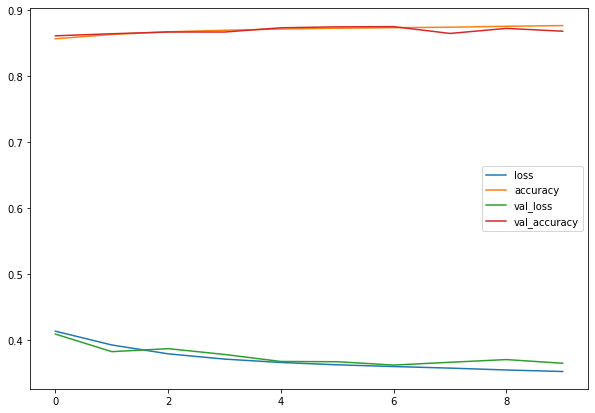

In [82]:
pd.DataFrame(history_2.history).plot(figsize=(10, 7));

Slight improvement from simple LSTM model